<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Grupos_de_Edad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a leer y cargar los siguientes archivos:

1. SEXO_GRUPO_EDAD -> tiene homicidios totales y separa por grupos de edad y sexo
2. CONAPO_POBT_GRUPOS_EDAD.xlsx

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np

from google.colab import files 
import io

In [2]:
upload = files.upload()

Saving CONAPO_POBT_GRUPOS_EDAD.xlsx to CONAPO_POBT_GRUPOS_EDAD.xlsx
Saving SEXO_GRUPO_EDAD.xlsm to SEXO_GRUPO_EDAD.xlsm


In [3]:
df_P=pd.read_excel(io.BytesIO(upload["CONAPO_POBT_GRUPOS_EDAD.xlsx"]), header=0)#df con los datos de la población
#df_P.drop(columns=['Unnamed: 0', 'RENGLON','CVE_GEO'], inplace=True, axis=1)
df_P.head(10) #Para ver las primeras 10 filas

,AÑO,ENTIDAD,EDAD,HOMBRES,MUJERES
0,2000,Total,0-9 años,9298628,11228025
1,2000,Total,10-19 años,10610286,10606857
2,2000,Total,20-29 años,8512767,9152658
3,2000,Total,30-39 años,6672302,7086056
4,2000,Total,40-49 años,4648029,4911136
5,2000,Total,50-59 años,2948954,3143862
6,2000,Total,60-69 años,1853170,2053243
7,2000,Total,70 y más años,1386251,1718798
8,2001,Total,0-9 años,9282322,8965896
9,2001,Total,10-19 años,10655911,10635282


In [4]:
df_Grupos=pd.read_excel(io.BytesIO(upload["SEXO_GRUPO_EDAD.xlsm"]), header=0)#df con los datos de la población
df_Grupos.tail(20)

,AÑO,ENTIDAD,GRUPO_EDAD,HOMBRES,MUJERES,TOTAL
200,2020,Total,Total,32336,3957,36773
201,2020,Total,0-9 años,134,109,244
202,2020,Total,10-19 años,2189,385,2574
203,2020,Total,20-29 años,9550,1178,10733
204,2020,Total,30-39 años,8328,883,9213
205,2020,Total,40-49 años,5565,586,6156
206,2020,Total,50-59 años,2601,271,2879
207,2020,Total,60-69 años,1080,146,1253
208,2020,Total,70 y más años,506,125,646
209,2020,Total,No especificado,2383,274,3075


In [ ]:
df_Grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AÑO         220 non-null    int64 
 1   ENTIDAD     220 non-null    object
 2   GRUPO_EDAD  220 non-null    object
 3   HOMBRES     220 non-null    int64 
 4   MUJERES     220 non-null    int64 
 5   TOTAL       220 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.4+ KB


##% DE HOMICIDIOS POR GRUPO DE EDAD Y SEXO

In [ ]:
df_Grupos["ENTIDAD"][0]

'Total'

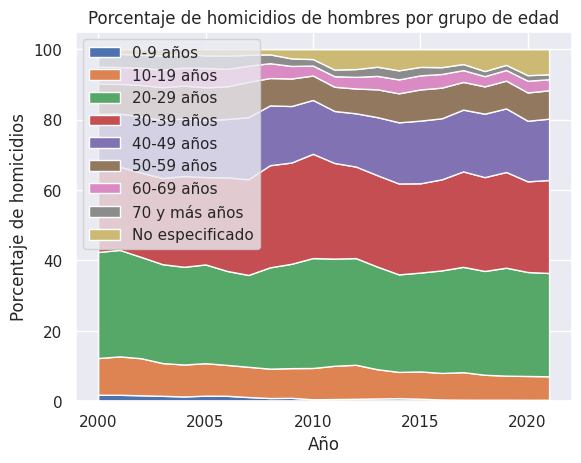

In [5]:
# Filtramos los datos para quedarnos con los homicidios de hombres por grupo de edad
df_Hombres = df_Grupos[df_Grupos['GRUPO_EDAD'] != 'Total']
df_Hombres = df_Hombres[['AÑO', 'GRUPO_EDAD', 'HOMBRES']]

# Calculamos el porcentaje de homicidios de hombres por grupo de edad
df_Hombres['PORCENTAJE'] = 100 * df_Hombres['HOMBRES'] / df_Hombres.groupby('AÑO')['HOMBRES'].transform('sum')

# Creamos la gráfica stackplot
plt.stackplot(df_Hombres['AÑO'].unique(), [df_Hombres[df_Hombres['GRUPO_EDAD']==grupo]['PORCENTAJE'] for grupo in df_Hombres['GRUPO_EDAD'].unique()], labels=df_Hombres['GRUPO_EDAD'].unique())
plt.legend(loc='upper left')
plt.xlabel('Año')
plt.ylabel('Porcentaje de homicidios')
plt.title('Porcentaje de homicidios de hombres por grupo de edad')
plt.show()


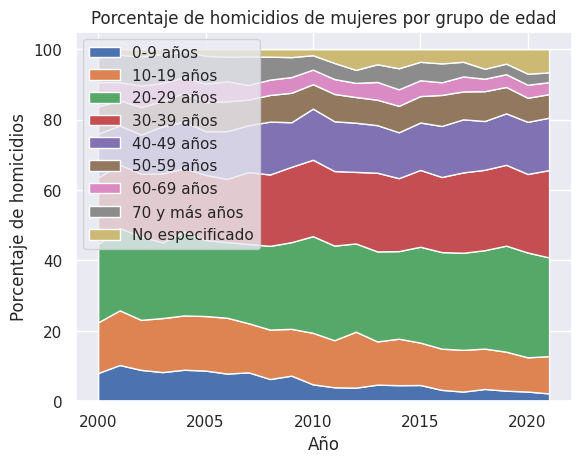

In [6]:
# Filtramos los datos para quedarnos con los homicidios de hombres por grupo de edad
df_Mujeres = df_Grupos[df_Grupos['GRUPO_EDAD'] != 'Total']
df_Mujeres = df_Mujeres[['AÑO', 'GRUPO_EDAD', 'MUJERES']]

# Calculamos el porcentaje de homicidios de hombres por grupo de edad
df_Mujeres['PORCENTAJE'] = 100 * df_Mujeres['MUJERES'] / df_Mujeres.groupby('AÑO')['MUJERES'].transform('sum')

# Creamos la gráfica stackplot
plt.stackplot(df_Mujeres['AÑO'].unique(), [df_Mujeres[df_Mujeres['GRUPO_EDAD']==grupo]['PORCENTAJE'] for grupo in df_Mujeres['GRUPO_EDAD'].unique()], labels=df_Mujeres['GRUPO_EDAD'].unique())
plt.legend(loc='upper left')
plt.xlabel('Año')
plt.ylabel('Porcentaje de homicidios')
plt.title('Porcentaje de homicidios de mujeres por grupo de edad')
plt.show()

##Porcentaje de homicidios por grupo a la edad

In [ ]:
df_Grupos.iloc[10]['HOMBRES']

8986

In [10]:
#Tasas de homicidio por estado
Grupos_Ho=[]
Grupos_Mu=[]
tasas_Ho=[]
tasas_Mu=[]
j=0

for grupos in range (1, 10,1):
  for i in range(grupos,len(df_Grupos),10):
    tasas_Ho.append( (df_Grupos.iloc[i]['HOMBRES']/float(df_Grupos.iloc[j]['HOMBRES']) )*100 )
    tasas_Mu.append( (df_Grupos.iloc[i]['MUJERES']/float(df_Grupos.iloc[j]['MUJERES']) )*100 )
    j=j+10
  Grupos_Ho.append(tasas_Ho)
  Grupos_Mu.append(tasas_Mu)
  j=0
  tasas_Ho=[]
  tasas_Mu=[]

#Grupos_Ho #

In [ ]:
for i in Grupos_Ho:
  print(len(i))

22
22
22
22
22
22
22
22
22


In [ ]:
len(Grupos_Ho)

9

In [8]:
years=list(range(2000, 2022))

In [ ]:
df1=log(df)

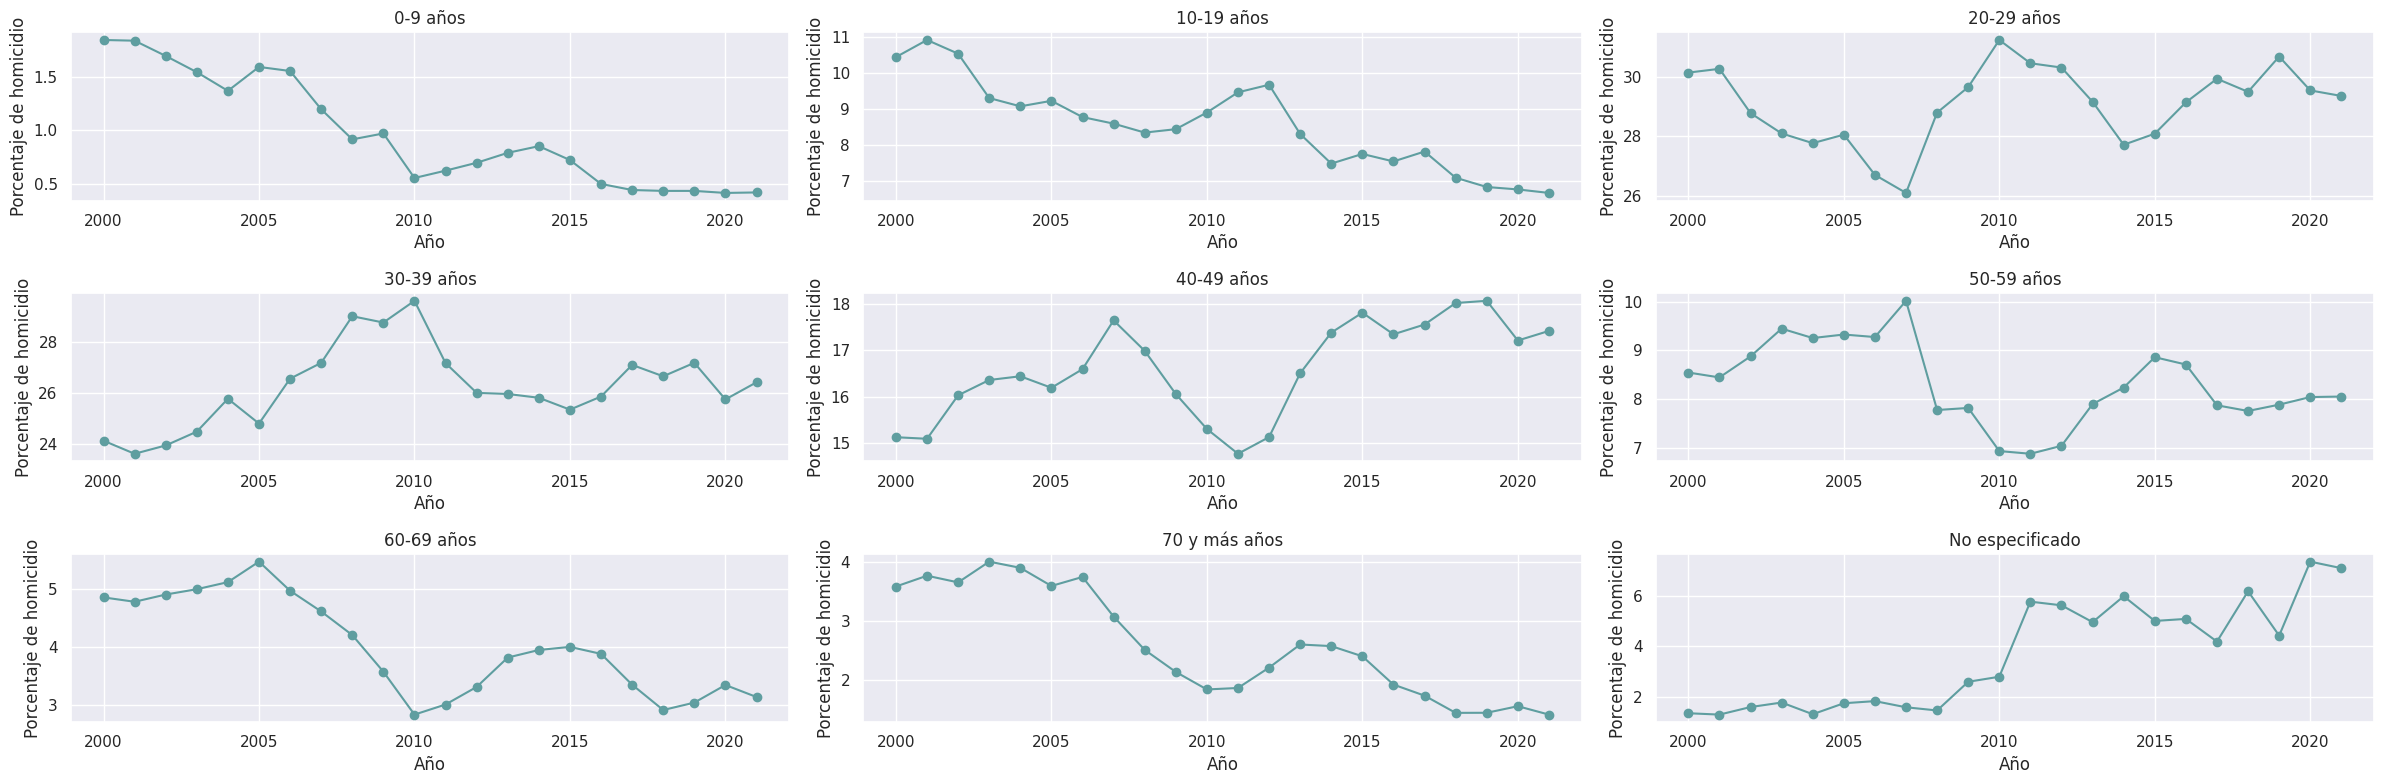

In [9]:
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
grupos_edad = ["0-9 años", "10-19 años", "20-29 años", "30-39 años", "40-49 años", "50-59 años", "60-69 años", "70 y más años", "No especificado"]
# crear una figura y un conjunto de subtramas para cada estado
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 8))

# ajustar el eje x en todas las gráficas para que se vea desde el año 2000 hasta el 2001
#for ax in axes.flatten():
  #ax.set_xlim(2000, 2001)
  #x=np.linspace(2000,2020)

# iterar sobre cada subtrama y graficar las tasas de homicidio para cada estado
for i, ax in enumerate(axes.flatten()):
    # obtener las tasas de homicidio para el estado actual
    state_homicides = Grupos_Ho[i]

    # crear una lista de años desde 2000 hasta 2021
    years = [year for year in range(2000, 2022)]

    # graficar las tasas de homicidio en función de los años
    ax.plot(years, state_homicides, color='#5F9EA0', marker='o')
    #ax.set_aspect(1./ax.get_data_ratio())
    #ax.set_ylim(100,40000)
    #ax.set_xlim(years[0],years[-1])#years[-1] última posi

    # establecer el título de la subtrama como el nombre del estado
    ax.set_title(grupos_edad[i])

    # establecer las etiquetas de los ejes
    ax.set_xlabel("Año")
    ax.set_ylabel("Porcentaje de homicidio")

    #for year in years:
      #index = years.index(year)
      #ax.text(year, state_homicides[index], str(state_homicides[index]), ha='center', va='bottom', fontsize=8)

# ajustar el espaciado entre las subtramas
plt.tight_layout()

# mostrar el gráfico
plt.show() 

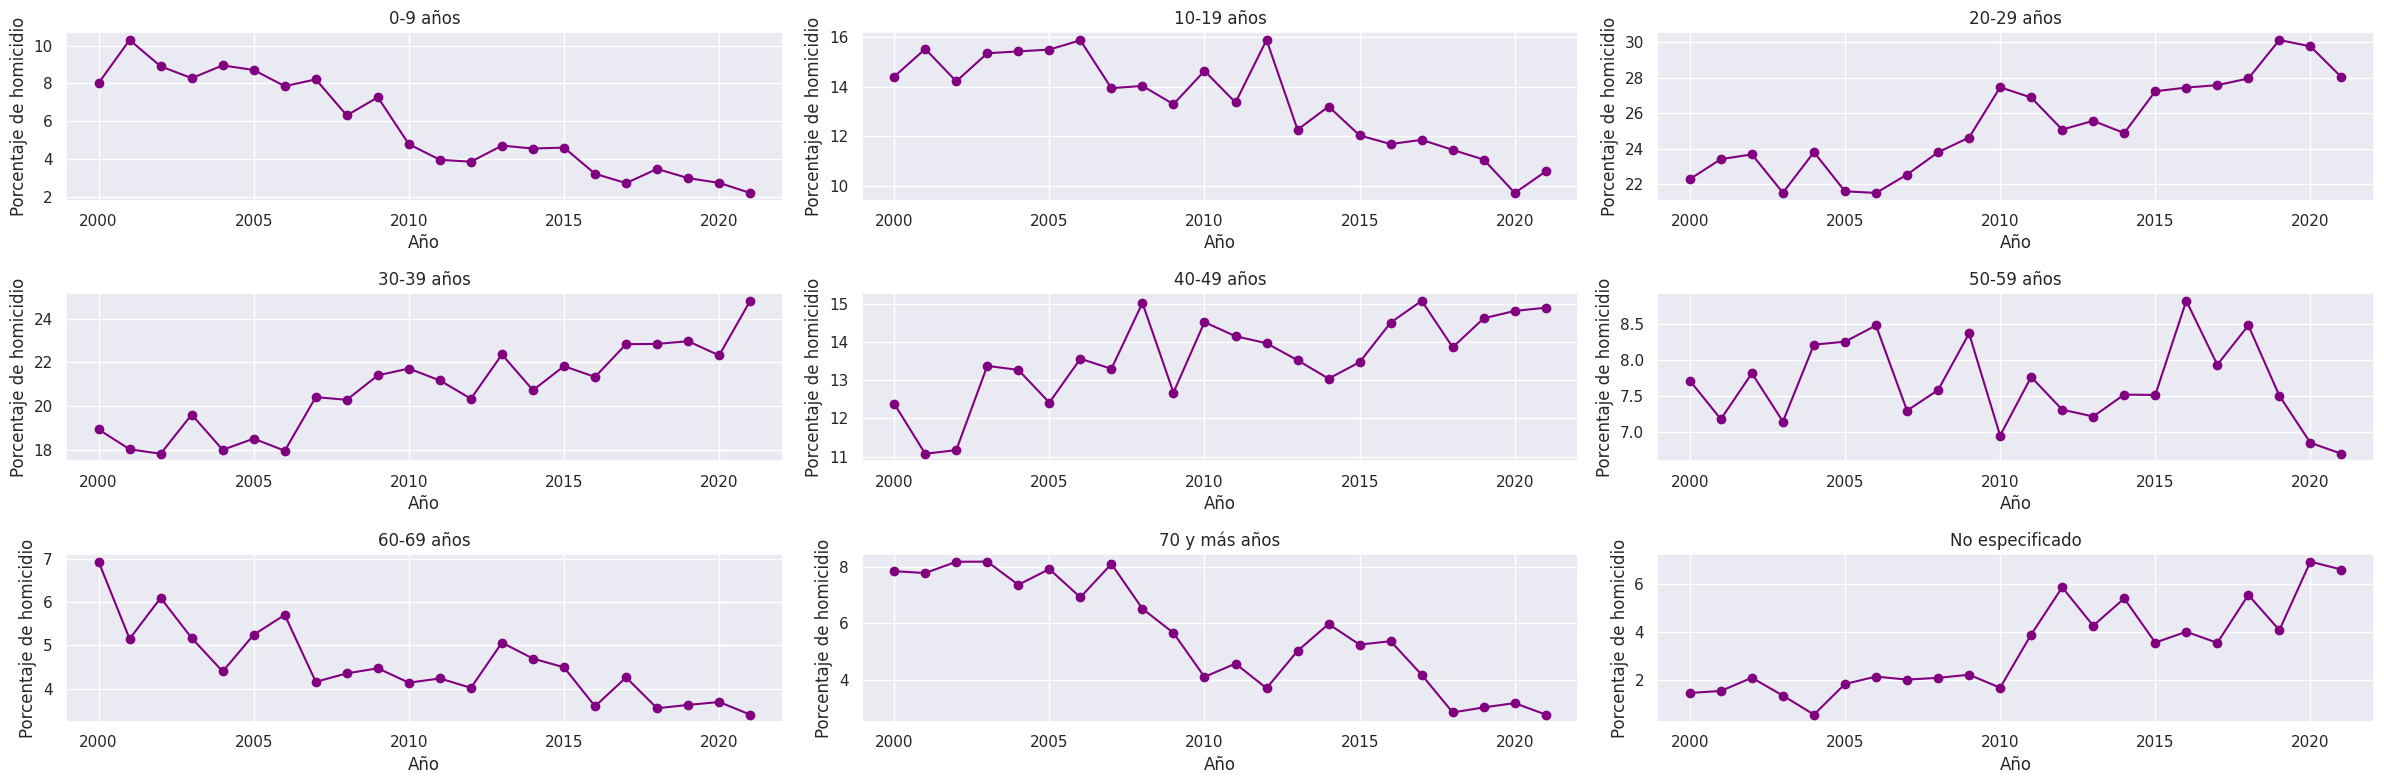

In [12]:
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
grupos_edad = ["0-9 años", "10-19 años", "20-29 años", "30-39 años", "40-49 años", "50-59 años", "60-69 años", "70 y más años", "No especificado"]
# crear una figura y un conjunto de subtramas para cada estado
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 8))

# ajustar el eje x en todas las gráficas para que se vea desde el año 2000 hasta el 2001
#for ax in axes.flatten():
  #ax.set_xlim(2000, 2001)
  #x=np.linspace(2000,2020)

# iterar sobre cada subtrama y graficar las tasas de homicidio para cada estado
for i, ax in enumerate(axes.flatten()):
    # obtener las tasas de homicidio para el estado actual
    state_homicides = Grupos_Mu[i]

    # crear una lista de años desde 2000 hasta 2021
    years = [year for year in range(2000, 2022)]

    # graficar las tasas de homicidio en función de los años
    ax.plot(years, state_homicides, color='purple', marker='o')
    #ax.set_aspect(1./ax.get_data_ratio())
    #ax.set_ylim(100,40000)
    #ax.set_xlim(years[0],years[-1])#years[-1] última posi

    # establecer el título de la subtrama como el nombre del estado
    ax.set_title(grupos_edad[i])

    # establecer las etiquetas de los ejes
    ax.set_xlabel("Año")
    ax.set_ylabel("Porcentaje de homicidio")

    #for year in years:
      #index = years.index(year)
      #ax.text(year, state_homicides[index], str(state_homicides[index]), ha='center', va='bottom', fontsize=8)

# ajustar el espaciado entre las subtramas
plt.tight_layout()

# mostrar el gráfico
plt.show() 

In [ ]:
# Modificar el tamaño de la letra
plt.rcParams.update({'font.size': 8})

plt.plot(years,tasas_Ho, label='Vía pública', color='#4169E1', marker='o')
for x, y in zip(years, tasas_Ho):
    plt.text(x, y+0.5, f'{round(y, 2)}', ha='center', va='bottom', rotation=90)

plt.plot(years, tasas_Hom_V, label='Casa', color='#6495ED', marker='*')
for x, y in zip(years, tasas_Hom_V):
    plt.text(x, y+1, f'{round(y, 2)}', ha='center', va='bottom', rotation=90)

plt.xlabel('AÑOS')#Nombre del eje
plt.ylabel('TASA DE HOMICIDIO')
plt.title('Tasas de homicidio de hombres según lugar de ocurrencia') #Título del gráfico
plt.grid(True) #Para que se marquen los cuadritos
plt.legend(loc='upper left') #Para que se visualicen las labels que establecimos arriba
plt.show()

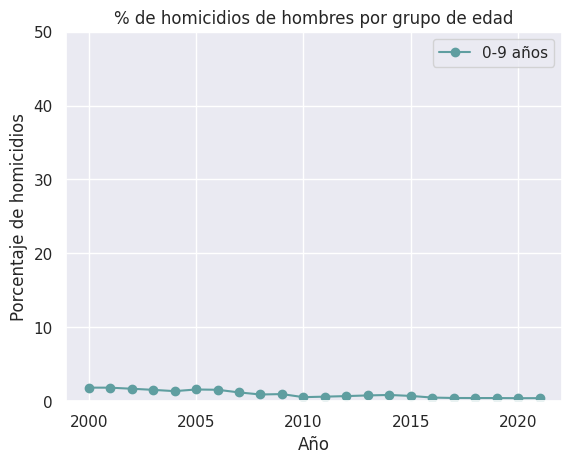

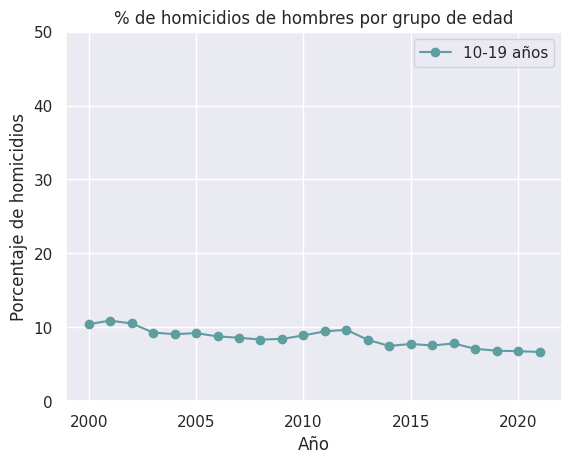

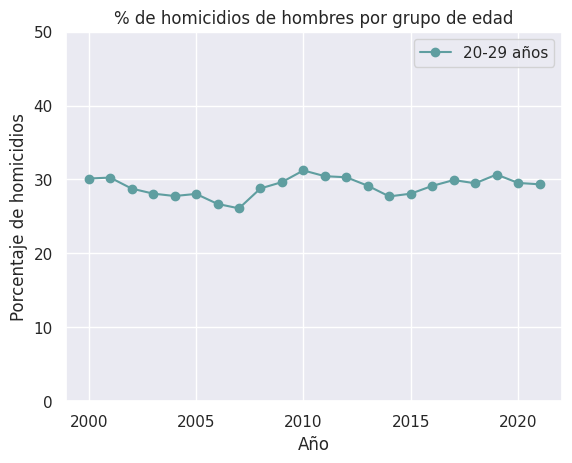

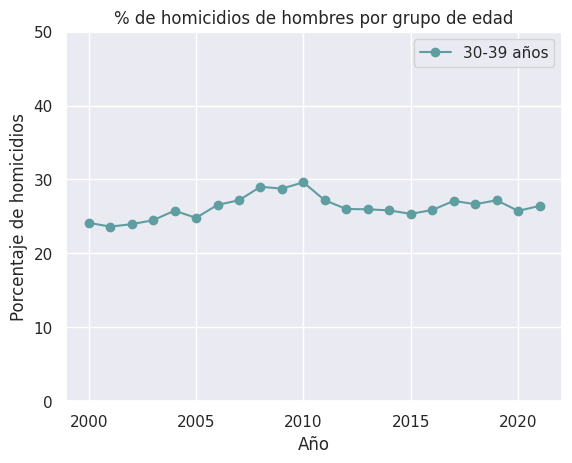

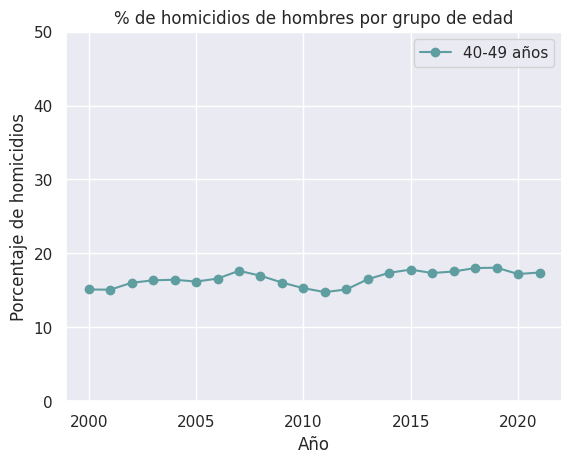

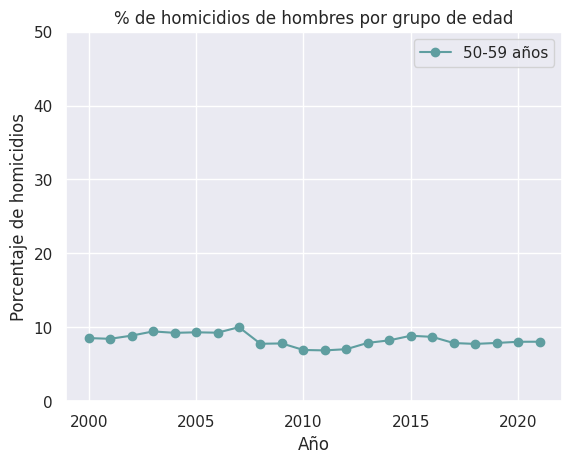

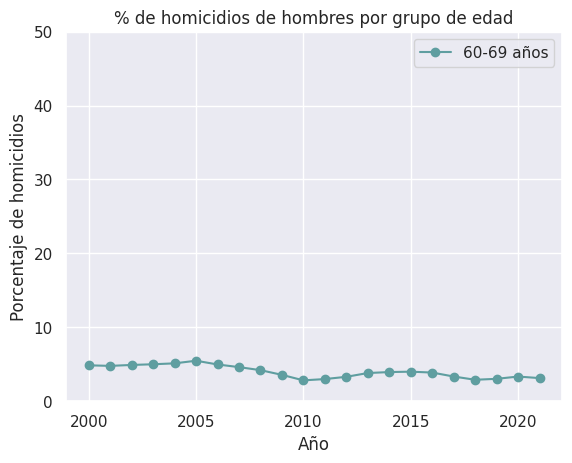

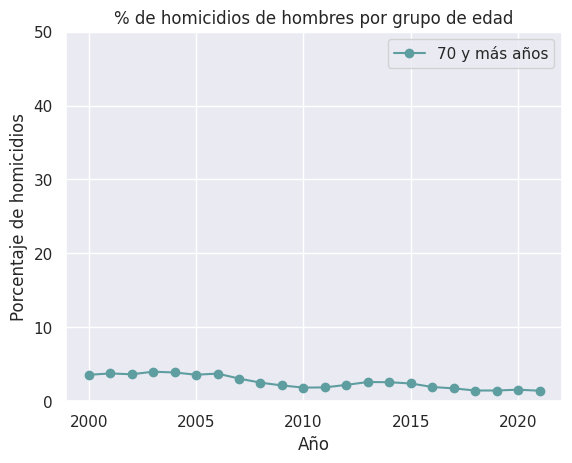

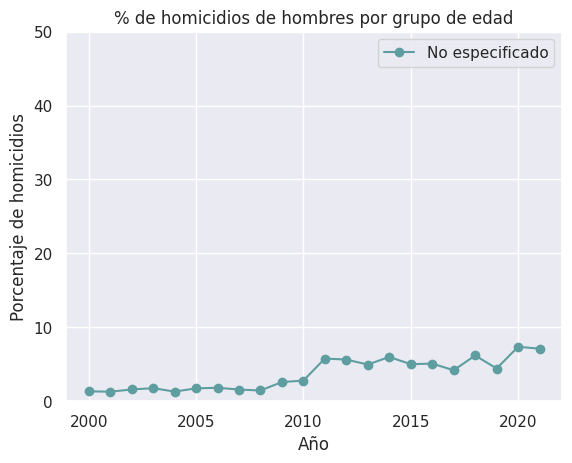

In [13]:
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
edades = ["0-9 años", "10-19 años", "20-29 años", "30-39 años", "40-49 años", "50-59 años", "60-69 años", "70 y más años", "No especificado"]

for i in range(len(Grupos_Ho)):
    plt.plot(years, Grupos_Ho[i], label=edades[i], color='#5F9EA0', marker='o')
    plt.xlabel("Año")
    plt.ylabel("Porcentaje de homicidios")
    plt.title("% de homicidios de hombres por grupo de edad")
    plt.ylim(0, 50)
    plt.legend()
    #for j, val in enumerate(Grupos_Ho[i]):
        #plt.text(years[j], val, str(round(val, 2)), ha='center', va='bottom', fontsize=8)
    plt.show()


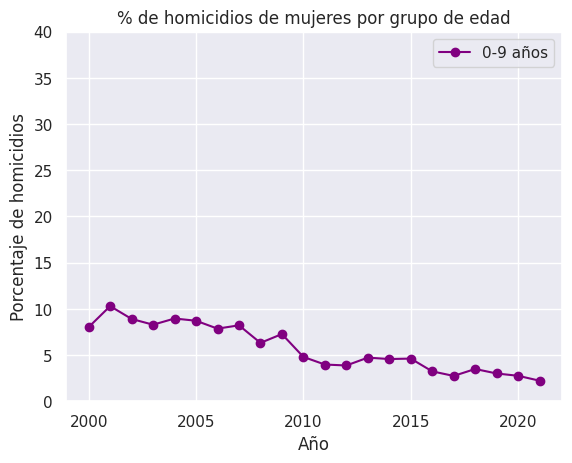

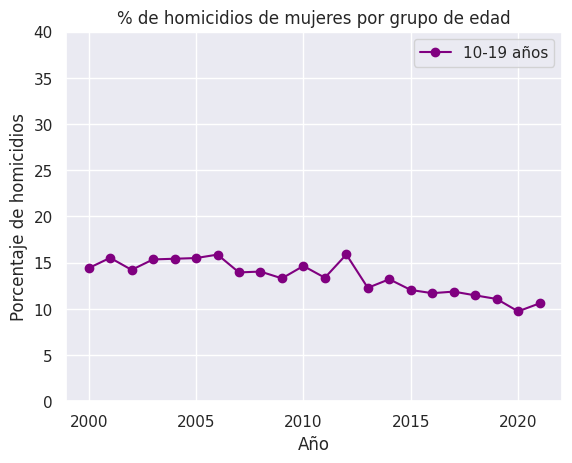

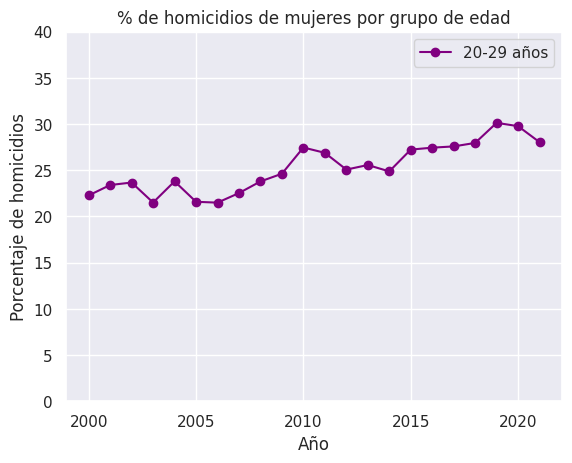

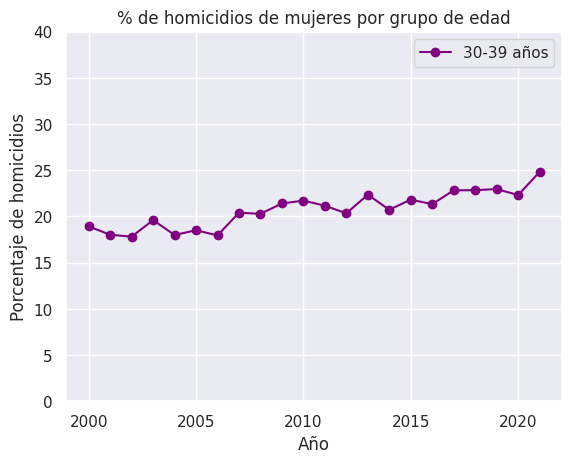

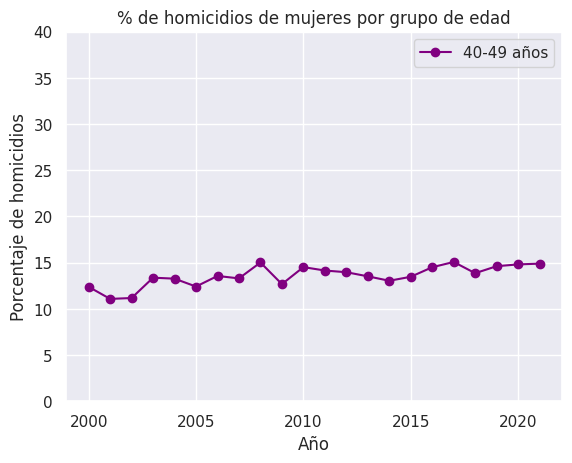

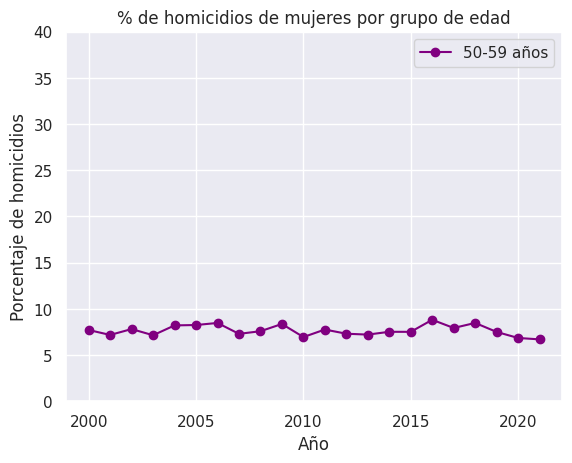

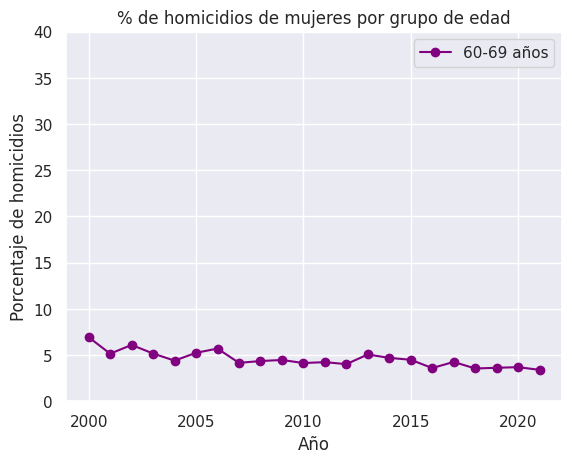

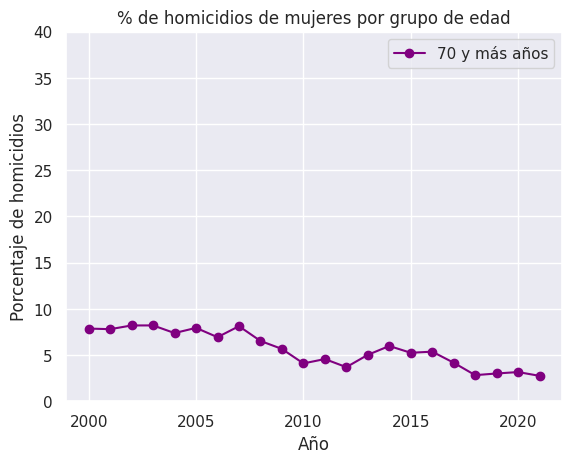

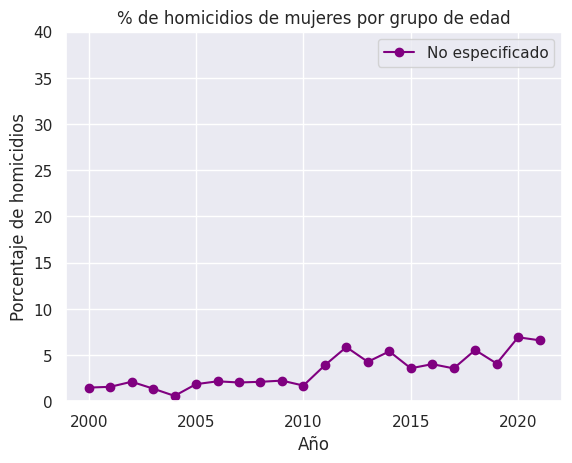

In [15]:
# lista de los nombres de los 32 estados de la república mexicana
#states = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila', 'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas']
edades = ["0-9 años", "10-19 años", "20-29 años", "30-39 años", "40-49 años", "50-59 años", "60-69 años", "70 y más años", "No especificado"]

for i in range(len(Grupos_Mu)):
    plt.plot(years, Grupos_Mu[i], label=edades[i], color='purple', marker='o')
    plt.xlabel("Año")
    plt.ylabel("Porcentaje de homicidios")
    plt.title("% de homicidios de mujeres por grupo de edad")
    plt.ylim(0, 40)
    plt.legend()
    #for j, val in enumerate(Grupos_Ho[i]):
        #plt.text(years[j], val, str(round(val, 2)), ha='center', va='bottom', fontsize=8)
    plt.show()

In [17]:
tasas=[]
for grupo in grupos:
  for i in range (len(x)):
    if x.iloc[i]["GRUPO_EDAD"]
#tasas   

SyntaxError: ignored

In [18]:
# crear un dataframe que contenga los datos de hombres en cada grupo de edad
df_hombres = df_Grupos[(df_Grupos["ENTIDAD"] == "Total") & (df_Grupos["GRUPO_EDAD"] != "Total") & (df_Grupos["GRUPO_EDAD"] != "No especificado") & (df_Grupos["MUJERES"] == 0)]

# crear una lista de los grupos de edad
grupos_edad = df_hombres["GRUPO_EDAD"].unique()

# crear una figura con una subfigura para cada grupo de edad
fig, axs = plt.subplots(len(grupos_edad), 1, figsize=(10, 20), sharex=True)

# iterar sobre los grupos de edad
for i, grupo_edad in enumerate(grupos_edad):

    # crear un dataframe que contenga los datos para el grupo de edad actual
    df_grupo_edad = df_hombres[df_hombres["GRUPO_EDAD"] == grupo_edad]

    # calcular la tasa de homicidios para cada año
    tasas = df_grupo_edad["HOMBRES"] / df_Grupos[df_Grupos["AÑO"] == df_grupo_edad["AÑO"].max()]["HOMBRES"].sum()

    # trazar la gráfica de línea
    axs[i].plot(df_grupo_edad["AÑO"], tasas)
    axs[i].set_title(grupo_edad)

# establecer las etiquetas del eje x y el título
plt.xlabel("Año")
plt.suptitle("Tasa de homicidios de hombres por grupo de edad")
plt.show()

ValueError: ignored

<Figure size 1000x2000 with 0 Axes>

<ipython-input-20-e3c0b6aa3b40>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_edad = df_edad.groupby("GRUPO_EDAD").sum()["HOMBRES"]


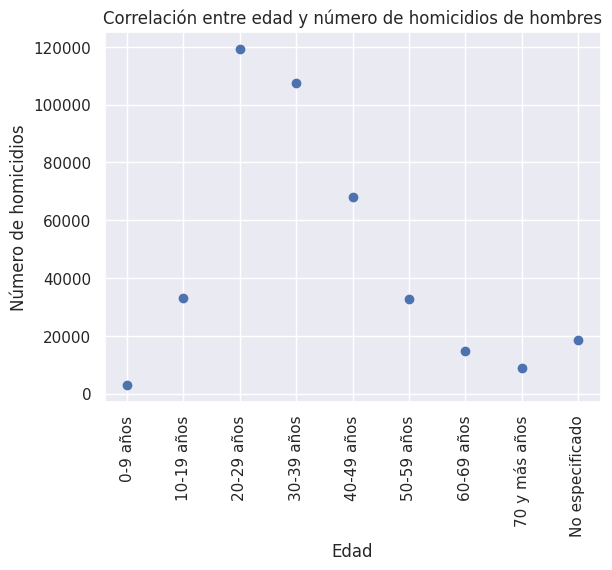

In [20]:
#Esto es a nivel nacional

# Filtro para tomar solo los datos de cada grupo de edad en cada año
df_edad = df_Grupos[(df_Grupos["ENTIDAD"] == "Total") & (df_Grupos["GRUPO_EDAD"] != "Total")]

# Agrupamos por grupo de edad y sumamos el número de homicidios
df_edad = df_edad.groupby("GRUPO_EDAD").sum()["HOMBRES"]

# Hacemos la gráfica de dispersión
plt.scatter(df_edad.index, df_edad.values)

# Añadimos los títulos y etiquetas de los ejes
plt.title("Correlación entre edad y número de homicidios de hombres")
plt.xlabel("Edad")
plt.ylabel("Número de homicidios")
plt.xticks(rotation=90)

# Mostramos la gráfica
plt.show()

Esta gráfica mostrará la correlación entre la edad y el número de homicidios para todos los años en el dataframe.

<ipython-input-23-b4bf582c7563>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_edad1 = df_edad1.groupby("GRUPO_EDAD").sum()["MUJERES"]


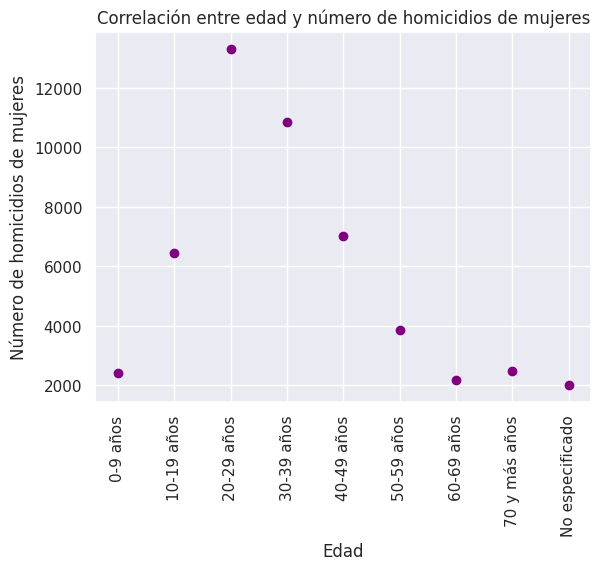

In [23]:
#Esto es a nivel nacional

# Filtro para tomar solo los datos de cada grupo de edad en cada año
df_edad1 = df_Grupos[(df_Grupos["ENTIDAD"] == "Total") & (df_Grupos["GRUPO_EDAD"] != "Total")]

# Agrupamos por grupo de edad y sumamos el número de homicidios
df_edad1 = df_edad1.groupby("GRUPO_EDAD").sum()["MUJERES"]

# Hacemos la gráfica de dispersión
plt.scatter(df_edad1.index, df_edad1.values, color="purple")

# Añadimos los títulos y etiquetas de los ejes
plt.title("Correlación entre edad y número de homicidios de mujeres")
plt.xlabel("Edad")
plt.ylabel("Número de homicidios de mujeres")

plt.xticks(rotation=90)

# Mostramos la gráfica
plt.show()